Problem Statement 10: Fix the header

In [28]:
import pandas as pd
metadata = pd.read_csv("C:\College\Futurense Internship\Data\metadata.csv")
hospitals_data = pd.read_csv("C:\College\Futurense Internship\Data\hospitals.csv")

header_names = metadata['Acronyms'].values.tolist()

hospitals_data.columns = ['State/UT'] + header_names + ['Hospitals', 'HospitalBeds']

hospitals_data.to_csv("C:\Semester 4\Term 10\Modified clean datasets\ all_hospitals.csv", index=False)

Problem Statement 11: Create a function to alter the data to create uniformity

In [29]:
def fix_state_names(data):
    data['States/UTs'] = data['States/UTs'].replace({
        'A & N Islands': 'Andaman and Nicobar Islands',
        'D & N Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
        'Daman & Diu': 'Dadra and Nagar Haveli and Daman and Diu',
        'Lakshadweep': 'Lakshadweep Islands',
        'NCT of Delhi': 'Delhi'
    })
    return data

govt_hospitals_data = pd.read_csv("C:\College\Futurense Internship\Data\government_hospitals.csv")

govt_hospitals_data = fix_state_names(govt_hospitals_data)

govt_hospitals_data.to_csv("C:\College\Futurense Internship\clean datasets\government_hospitals_updated.csv", index=False)


Problem Statement 12: Analyze Healthcare facility disparity

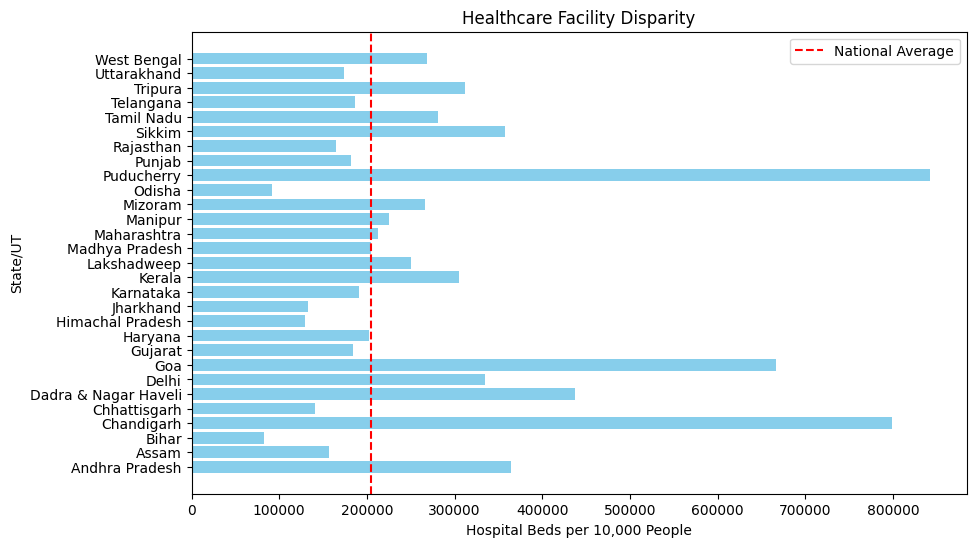

States/UTs with the least amount of beds for their population:
          Unnamed: 0   Beds_per_10k
4              Bihar   82926.374651
25            Odisha   91700.944969
13  Himachal Pradesh  129746.646796


In [30]:
import matplotlib.pyplot as plt

hospitals_data = pd.read_csv("C:\College\Futurense Internship\Data\hospitals.csv")

hospitals_data[['PHC', 'CHC', 'SDH', 'DH', 'HospitalBeds']] = hospitals_data[['PHC', 'CHC', 'SDH', 'DH', 'HospitalBeds']].apply(pd.to_numeric, errors='coerce')

hospitals_data.dropna(subset=['PHC', 'CHC', 'SDH', 'DH', 'HospitalBeds'], inplace=True)

hospitals_data['Beds_per_10k'] = hospitals_data['HospitalBeds'] / (hospitals_data['PHC'] + hospitals_data['CHC'] + hospitals_data['SDH'] + hospitals_data['DH']) * 10000

national_average = hospitals_data['HospitalBeds'].sum() / (hospitals_data['PHC'].sum() + hospitals_data['CHC'].sum() + hospitals_data['SDH'].sum() + hospitals_data['DH'].sum()) * 10000

plt.figure(figsize=(10, 6))
plt.barh(hospitals_data['Unnamed: 0'], hospitals_data['Beds_per_10k'], color='skyblue')
plt.axvline(x=national_average, color='red', linestyle='--', label='National Average')
plt.xlabel('Hospital Beds per 10,000 People')
plt.ylabel('State/UT')
plt.title('Healthcare Facility Disparity')
plt.legend()
plt.show()

least_beds_states = hospitals_data.nsmallest(3, 'Beds_per_10k')[['Unnamed: 0', 'Beds_per_10k']]
print("States/UTs with the least amount of beds for their population:")
print(least_beds_states)


Problem Statement 13: Multi-line header

In [2]:
import pandas as pd
import os

output_dir = "C:\College\Futurense Internship\clean datasets"
os.makedirs(output_dir, exist_ok=True)

govt_hospitals_data = pd.read_csv("C:\College\Futurense Internship\Data\government_hospitals.csv", header=[0, 1])

govt_hospitals_data.columns = ['State/UT', 'Rural_Government_Hospitals', 'Rural_Government_Beds', 'Urban_Government_Hospitals', 'Urban_Government_Beds', 'Last_Updated']
govt_hospitals_data.to_csv(os.path.join(output_dir, "government_hospitals_updated.csv"), index=False)


Problem Statement 14: Data update and code reuse

In [32]:
govt_hospitals_data = pd.read_csv("C:\College\Futurense Internship\Data\government_hospitals.csv", header=[0, 1])

govt_hospitals_data.columns = ['State/UT', 'Rural_Government_Hospitals', 'Rural_Government_Beds', 'Urban_Government_Hospitals', 'Urban_Government_Beds', 'Last_Updated']

govt_hospitals_data['Last_Updated'] = pd.to_datetime(govt_hospitals_data['Last_Updated'], format='%d.%m.%Y')

govt_hospitals_data.to_csv("C:\College\Futurense Internship\clean datasets\government_hospital.csv", index=False)
